# Overview of this jupyter notebook

1. Loading screwing data
2. Plot representative curve of each classes
3. Plot average curve shape in the initial phase
4. Plot rising point of the curves
5. Plot maximum value of the curves
6. Save curves as a dataframe

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tq
import itertools 
import importlib
from library import etl_helper as etl   # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc          # this module contains the color combination of FAPS Institute
print(importlib.reload(etl))
print(importlib.reload(fapsc))

<module 'library.etl_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\etl_helper.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>


## 1. Loading screwing data

In [6]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v3',
 '2_versetzte_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_span_im_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [3]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [4]:
df0, len_curves = etl.load_data(main_path, folders=folders[0], fname="\\class0_", downsample=20, file_amount=800)
df1, len_curves = etl.load_data(main_path, folders=folders[1], fname="\\class1_", downsample=20, file_amount=200)
df2, len_curves = etl.load_data(main_path, folders=folders[2], fname="\\class2_", downsample=20, file_amount=200)
df3, len_curves = etl.load_data(main_path, folders=folders[3], fname="\\class3_", downsample=20, file_amount=200)
df4, len_curves = etl.load_data(main_path, folders=folders[4], fname="\\class4_", downsample=20, file_amount=200)
df5, len_curves = etl.load_data(main_path, folders=folders[5], fname="\\class5_", downsample=20, file_amount=200)
df6, len_curves = etl.load_data(main_path, folders=folders[6], fname="\\class6_", downsample=20, file_amount=200)
df7, len_curves = etl.load_data(main_path, folders=folders[7], fname="\\class7_", downsample=20, file_amount=200)

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [5]:
df0 = pd.read_pickle("dataframes/df0_v2.pkl")
df1 = pd.read_pickle("dataframes/df1_v2.pkl")
df2 = pd.read_pickle("dataframes/df2_v2.pkl")
df3 = pd.read_pickle("dataframes/df3_v2.pkl")
df4 = pd.read_pickle("dataframes/df4_v2.pkl")
df5 = pd.read_pickle("dataframes/df5_v2.pkl")
df6 = pd.read_pickle("dataframes/df6_v2.pkl")
df7 = pd.read_pickle("dataframes/df7_v2.pkl")

In [6]:
df0.shape, df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape

((775, 800),
 (931, 200),
 (812, 200),
 (697, 200),
 (803, 200),
 (766, 200),
 (743, 200),
 (748, 200))

In [7]:
df_single = [df0, df1, df2, df3, df4, df5, df6, df7]
length = []

for i in df_single:
    length.append(i.shape[1])
    
length

[800, 200, 200, 200, 200, 200, 200, 200]

In [8]:
class_sector = [0] + list(itertools.accumulate(length))
class_sector

[0, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200]

In [9]:
df = etl.concat_df(df_single, shift_curves=False)
df = df.iloc[:920]
df

,0,1,2,3,4,5,6,7,8,9,...,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.00000,0.00000,0.01792,0.01792,0.00448,0.01344,0.00448,0.01792,0.00000,0.01792
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.00000,0.00000,0.01792,0.01344,0.00448,0.01344,0.00448,0.01792,0.00000,0.01792
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00896,0.00448,0.00896,0.01792,0.00896,0.01792,0.00448,0.01792
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00896,0.00896,0.00448,0.00000,0.00896,0.00896,0.01344,0.01344,0.01344,0.00896
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.01344,0.01792,0.00896,0.00448,0.01344,0.01792,0.01344,0.01792,0.01344,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# 2. Plot representative curve of each classes

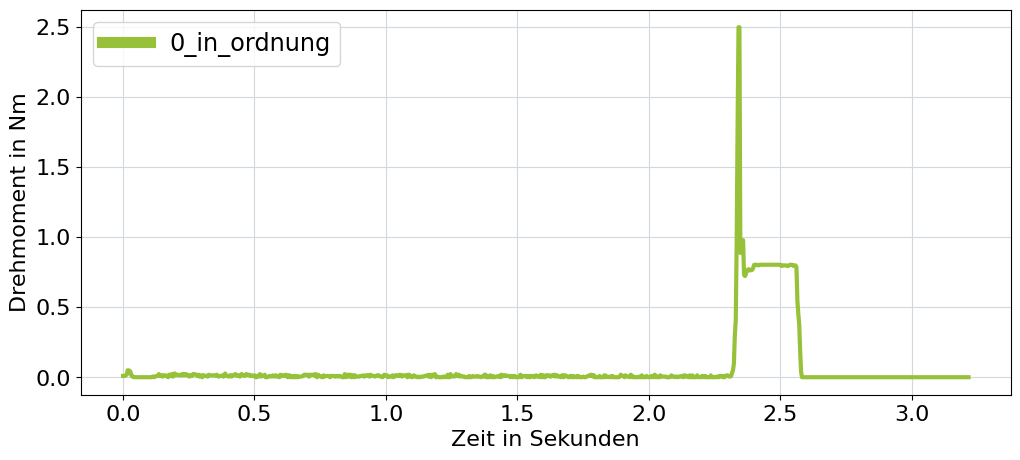

In [10]:
plt.figure(figsize=(12,5), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[1], fapsc.green, label=classes[0], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize="xx-large")
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

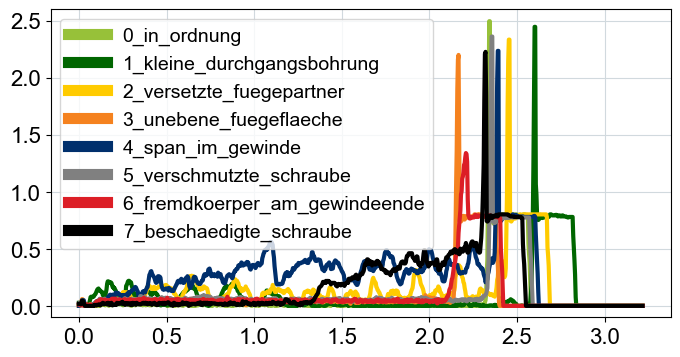

In [18]:
plt.figure(figsize=(8,4), dpi=100)
plt.rcParams['font.family'] = ['Arial']
#plt.xlabel("Zeit in Sekunden", fontsize=16)
#plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.1, 2.6)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[1]+151]], fapsc.dark_green, label=classes[1], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[2]+100]], fapsc.yellow, label=classes[2], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[3]+103]], fapsc.orange, label=classes[3], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[4]+180]], fapsc.blue, label=classes[4], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[5]+3]], fapsc.grey_0, label=classes[5], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[6]+117]], fapsc.red, label=f"6_fremdkoerper_am_gewindeende", linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[7]+106]], fapsc.black, label=classes[7], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

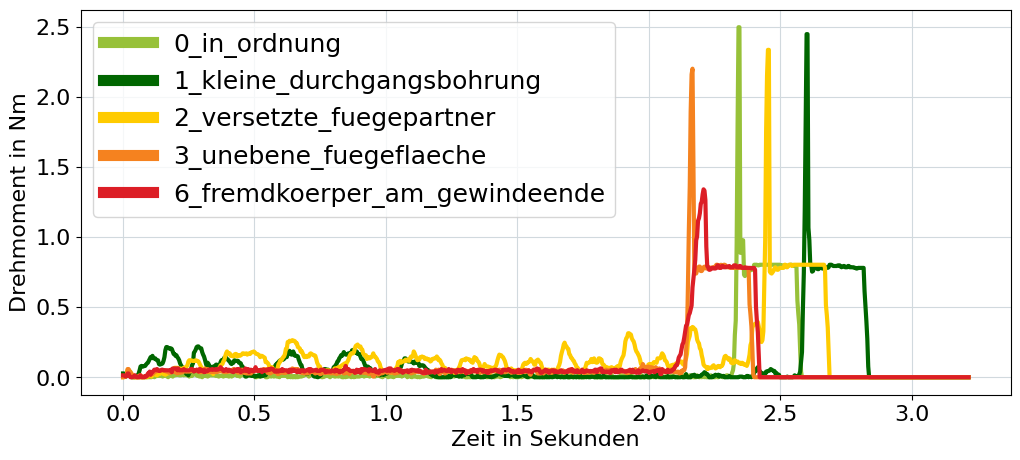

In [11]:
plt.figure(figsize=(12,5), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[1]+151]], fapsc.dark_green, label=classes[1], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[2]+100]], fapsc.yellow, label=classes[2], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[3]+103]], fapsc.orange, label=classes[3], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[4]+9]], fapsc.blue, label=classes[4], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[5]+1]], fapsc.grey_0, label=classes[5], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[6]+117]], fapsc.red, label=classes[6], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[7]+4]], fapsc.black, label=classes[7], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize=18)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

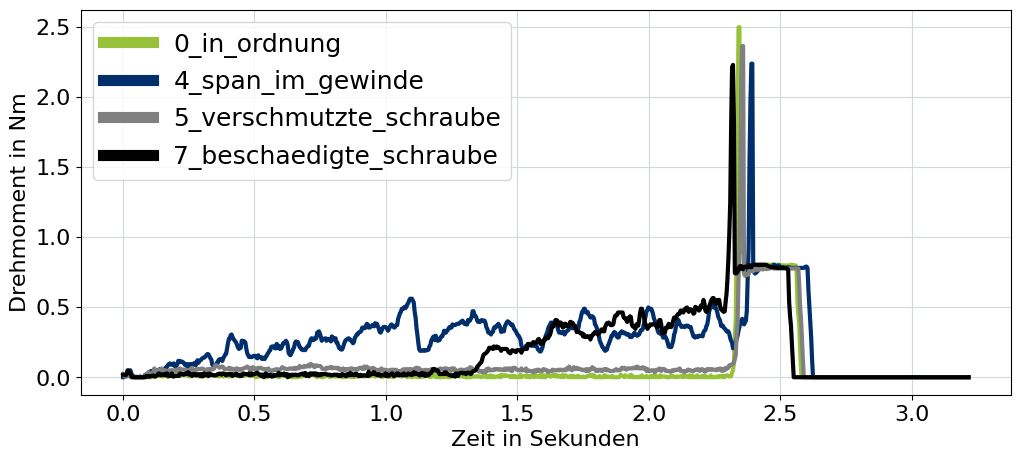

In [12]:
plt.figure(figsize=(12,5), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=16)
plt.ylabel("Drehmoment in Nm", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
linewidth = 3

plt.plot(etl.set_time(df), df[df.columns[class_sector[0]+1]], fapsc.green, label=classes[0], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[1]+151]], fapsc.dark_green, label=classes[1], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[2]+2]], fapsc.yellow, label=classes[2], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[3]+3]], fapsc.orange, label=classes[3], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[4]+180]], fapsc.blue, label=classes[4], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[5]+3]], fapsc.grey_0, label=classes[5], linewidth=linewidth)
#plt.plot(etl.set_time(df), df[df.columns[class_sector[6]+100]], fapsc.red, label=classes[6], linewidth=linewidth)
plt.plot(etl.set_time(df), df[df.columns[class_sector[7]+106]], fapsc.black, label=classes[7], linewidth=linewidth)

leg = plt.legend(loc='upper left', fontsize=18)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

# 3. Plot average curve shape in the initial phase

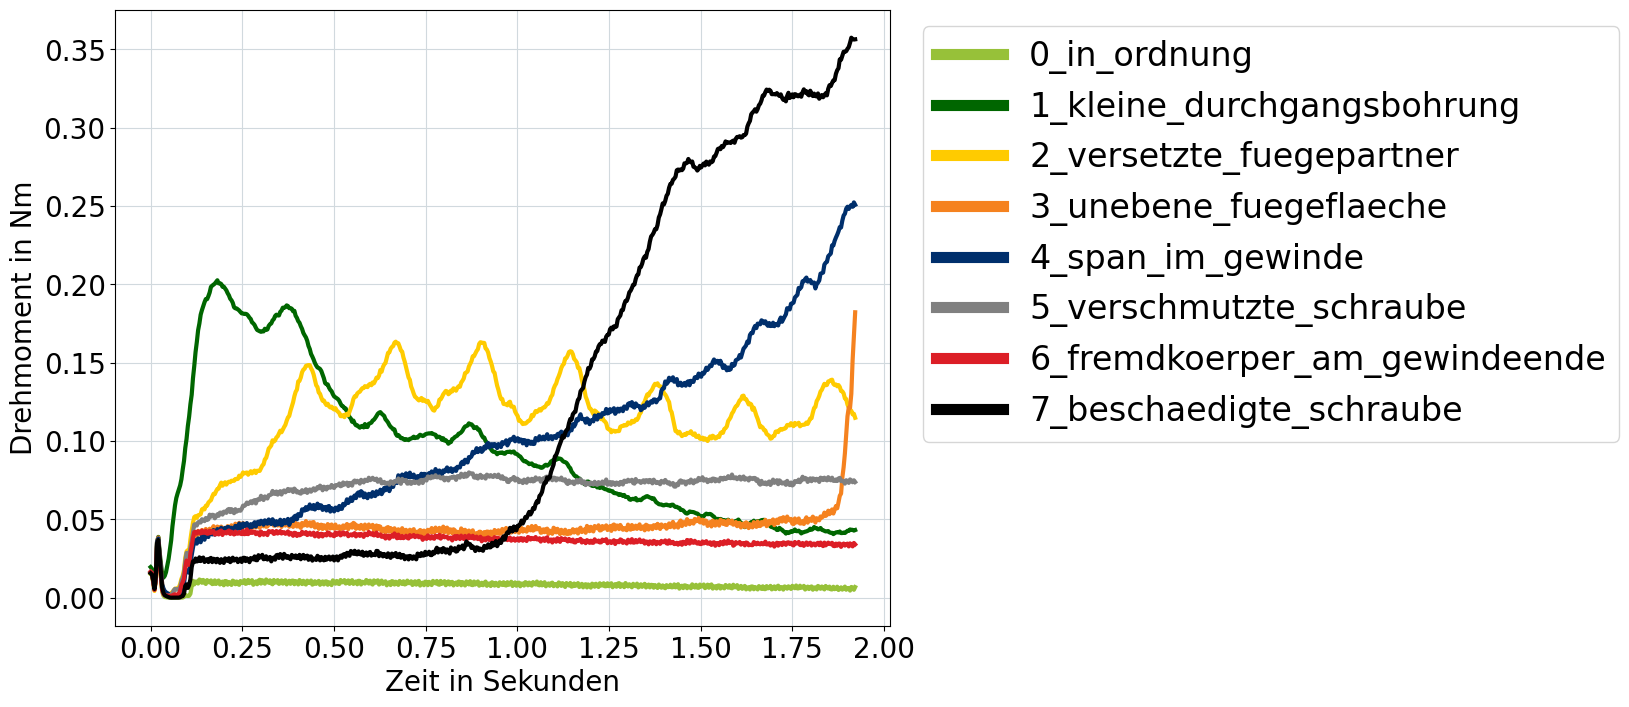

In [102]:
plt.figure(figsize=(10,8), dpi=100)
plt.xlabel("Zeit in Sekunden", fontsize=20)
plt.ylabel("Drehmoment in Nm", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
linewidth = 3
data_points = 550

plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[0]:class_sector[1]]].iloc[:data_points], axis=1), 
         fapsc.green, label=classes[0], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[1]:class_sector[2]]].iloc[:data_points], axis=1), 
         fapsc.dark_green, label=classes[1], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[2]:class_sector[3]]].iloc[:data_points], axis=1), fapsc.yellow, label=classes[2], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[3]:class_sector[4]]].iloc[:data_points], axis=1), fapsc.orange, label=classes[3], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[4]:class_sector[5]]].iloc[:data_points], axis=1), fapsc.blue, label=classes[4], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[5]:class_sector[6]]].iloc[:data_points], axis=1), fapsc.grey_0, label=classes[5], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[6]:class_sector[7]]].iloc[:data_points], axis=1), fapsc.red, label=classes[6], linewidth=linewidth)
plt.plot(etl.set_time(df.iloc[:data_points]), np.mean(df[df.columns[class_sector[7]:class_sector[8]]].iloc[:data_points], axis=1), fapsc.black, label=classes[7], linewidth=linewidth)

leg = plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=24)
for line in leg.get_lines():
    line.set_linewidth(8)
plt.grid(color=fapsc.grey_3, linestyle='-')
plt.show()

# 4. Plot rising point of the curves

In [13]:
rising_point = etl.get_rising_point(df)
rising_point_time = np.array(rising_point) * 0.0035
rising_time = rising_point_time[600:]
rising_time.shape

(1600,)

In [14]:
df_rise = pd.DataFrame(rising_time.reshape(-1, 200), index=classes)
df_rise = df_rise.transpose()
df_rise

,0_in_ordnung,1_kleine_durchgangsbohrung,2_versetzte_fuegepartner,3_unebene_fuegeflaeche,4_span_im_gewinde,5_verschmutzte_schraube,6_fremdkoerper_am_gewindeende,7_beschaedigte_schraube
0,2.3345,2.4640,2.4465,2.1560,2.3555,2.3380,2.2470,2.3240
1,2.3310,2.6005,2.4745,2.0615,2.1945,2.2995,2.1875,2.2890
2,2.3310,2.6005,2.4360,1.9250,2.4080,2.3415,2.1875,2.3030
3,2.2925,2.5235,2.4010,1.9215,2.3625,2.3450,2.1945,2.2995
4,2.3170,2.6775,2.4150,1.9635,2.3730,2.3590,2.1945,2.2820
...,...,...,...,...,...,...,...,...
195,2.3835,2.7895,2.3485,2.1910,2.3555,2.4010,2.2015,2.2855
196,2.3730,2.5935,2.3660,2.1665,2.3450,2.4220,2.1840,2.2995
197,2.3765,2.5795,2.3905,2.1875,2.4710,2.4045,2.1140,2.3065
198,2.3555,2.5830,2.3835,2.1140,2.3975,2.3765,2.1665,2.3380


In [14]:
def box_plot_color(ax, data, edge_color, fill_color, vert):
    bp = ax.boxplot(data, patch_artist=True, showmeans=True, vert=vert,
                    meanprops={"marker":"o",
                               "markerfacecolor":"black", 
                               "markeredgecolor":"black",
                               "markersize":"6"})
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, linewidth=2)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

C:\Users\songs\AppData\Local\Temp\ipykernel_1160\3391645667.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(classes[::-1], fontsize=14)


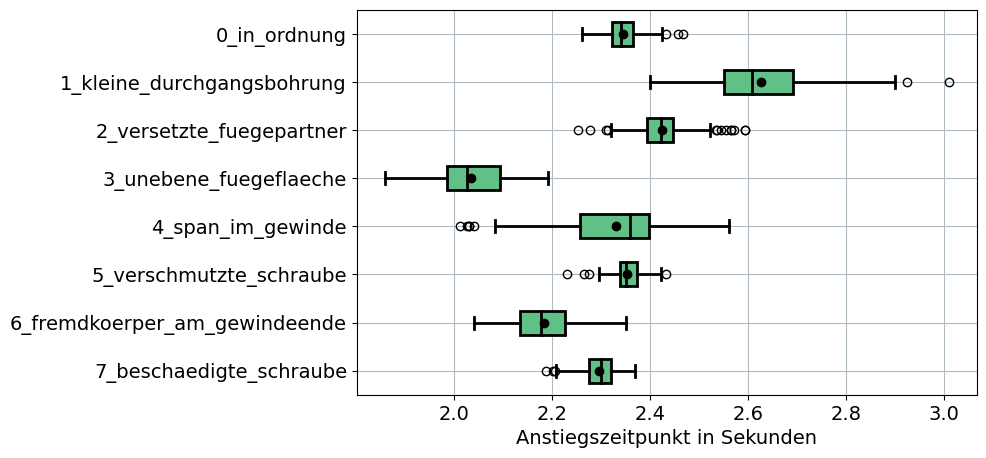

In [30]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
plt.xticks(fontsize=14)
ax.set_yticklabels(classes[::-1], fontsize=14)
plt.xlabel("Anstiegszeitpunkt in Sekunden", fontsize=14)
box_plot_color(ax, df_rise[df_rise.columns[::-1]], fapsc.black, fapsc.dark_green_light, vert=False)
plt.grid(color=fapsc.grey_2, linestyle='-')
plt.show()

# 5. Plot maximum value of the curves

In [9]:
max_values = np.array(etl.get_max_values(df))
max_values.shape

(2200,)

In [10]:
max_val = max_values[600:].reshape(-1, 200)
max_val.shape

(8, 200)

In [11]:
df_max = pd.DataFrame(max_val, index=classes)
df_max = df_max.transpose()
df_max

,0_in_ordnung,1_kleine_durchgangsbohrung,2_versetzte_fuegepartner,3_unebene_fuegeflaeche,4_span_im_gewinde,5_verschmutzte_schraube,6_fremdkoerper_am_gewindeende,7_beschaedigte_schraube
0,2.44160,2.38784,2.15936,2.24448,2.23552,2.16384,1.18720,2.26240
1,2.49536,1.93536,1.92192,2.17280,2.32960,2.33408,1.14688,1.97120
2,2.46848,2.15488,2.01600,2.16832,2.14144,2.17280,1.34848,2.03840
3,2.29824,2.28928,1.21408,2.13248,1.68000,2.36096,1.27680,2.10112
4,2.24000,2.34304,2.43712,2.31168,1.91296,2.23552,1.16480,1.94880
...,...,...,...,...,...,...,...,...
195,2.33856,2.22656,2.40576,1.95328,2.33408,2.35648,1.24544,2.49984
196,2.47744,2.19520,2.31616,2.05632,2.02048,2.21760,1.28576,2.23104
197,2.40576,2.22208,2.37888,1.97568,2.24000,2.54464,1.02592,2.32960
198,2.45504,2.30272,2.24896,1.93984,2.19520,2.35200,1.03040,2.25792


In [18]:
cl_names = [f"Klasse {x}" for x in range(8)]

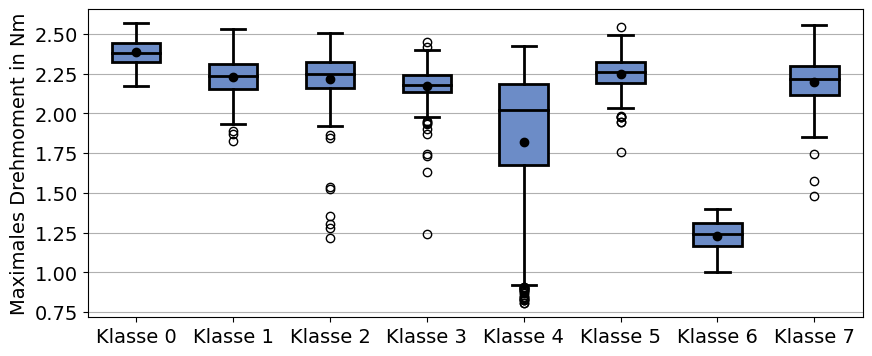

In [19]:
fig, ax = plt.subplots(figsize=(10,4), dpi=100)
box_plot_color(ax, df_max, fapsc.black, fapsc.blue_light, vert=True)

ax.set_axisbelow(True)
plt.yticks(fontsize=14)
plt.ylabel("Maximales Drehmoment in Nm", fontsize=14)
#ax.set_title(title, fontsize=15)
#ax.set_ylabel('Ergebnisse der Testdaten', fontsize=15)
#ax.set_ylim(lower, upper)
ax.set_xticklabels(cl_names, fontsize=14)


ax.yaxis.grid()
#ax.tick_params(axis='both', labelsize=15)

plt.show()


# 6. Save curves as a dataframe

In [7]:
etl.save_df(df0, "df0_v2")

dataframe df0_v2 is saved


In [8]:
etl.save_df(df1, "df1_v2")

dataframe df1_v2 is saved


In [9]:
etl.save_df(df2, "df2_v2")

dataframe df2_v2 is saved


In [10]:
etl.save_df(df3, "df3_v2")

dataframe df3_v2 is saved


In [11]:
etl.save_df(df4, "df4_v2")

dataframe df4_v2 is saved


In [12]:
etl.save_df(df5, "df5_v2")

dataframe df5_v2 is saved


In [13]:
etl.save_df(df6, "df6_v2")

dataframe df6_v2 is saved


In [14]:
etl.save_df(df7, "df7_v2")

dataframe df7_v2 is saved
